In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Deep Learning Algorithm
## Deep Neural Network

In [3]:
# Loading data
SC = pd.read_csv('C:/Users/User/Desktop/seungchon.csv', encoding='cp949')
JS = pd.read_csv('C:/Users/User/Desktop/juksan.csv', encoding='cp949')

In [4]:
SC_train = SC.loc[SC['Year']!=2022]
SC_test = SC.loc[SC['Year']==2022]
SC_train_x = SC_train.iloc[:,5:24].drop(labels="Chla", axis=1)
SC_train_y = SC_train.iloc[:,5:24].iloc[:,-7]
SC_test_x = SC_test.iloc[:,5:24].drop(labels="Chla", axis=1)
SC_test_y = SC_test.iloc[:,5:24].iloc[:,-7]

In [5]:
JS_train = JS.loc[JS['Year']!=2022]
JS_test = JS.loc[JS['Year']==2022]
JS_train_x = JS_train.iloc[:,5:24].drop(labels="Chla", axis=1)
JS_train_y = JS_train.iloc[:,5:24].iloc[:,-7]
JS_test_x = JS_test.iloc[:,5:24].drop(labels="Chla", axis=1)
JS_test_y = JS_test.iloc[:,5:24].iloc[:,-7]

In [6]:
# 반드시 tensorflow 먼저 설치
!pip install tensorflow 

In [7]:
!pip install Keras

In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [10]:
# DNN model (SC)
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [11]:
hist = model.fit(
    SC_train_x, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 1s - loss: 7290.1284 - mean_squared_error: 7290.1284 - mean_absolute_error: 74.8411 - val_loss: 9676.6992 - val_mean_squared_error: 9676.6992 - val_mean_absolute_error: 86.4451 - 546ms/epoch - 68ms/step
Epoch 2/100
8/8 - 0s - loss: 4458.8960 - mean_squared_error: 4458.8960 - mean_absolute_error: 56.4560 - val_loss: 8344.7949 - val_mean_squared_error: 8344.7949 - val_mean_absolute_error: 78.1494 - 24ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 3798.7598 - mean_squared_error: 3798.7598 - mean_absolute_error: 50.6691 - val_loss: 7998.5327 - val_mean_squared_error: 7998.5327 - val_mean_absolute_error: 75.8764 - 23ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 3662.8452 - mean_squared_error: 3662.8452 - mean_absolute_error: 49.1266 - val_loss: 7903.4971 - val_mean_squared_error: 7903.4971 - val_mean_absolute_error: 75.1615 - 20ms/epoch - 2ms/step
Epoch 5/100
8/8 - 0s - loss: 3596.4536 - mean_squared_error: 3596.4536 - mean_absolute_error: 48.3182 - val_loss: 7785.719

Epoch 39/100
8/8 - 0s - loss: 1453.8113 - mean_squared_error: 1453.8113 - mean_absolute_error: 26.8774 - val_loss: 3672.2690 - val_mean_squared_error: 3672.2690 - val_mean_absolute_error: 40.4708 - 20ms/epoch - 2ms/step
Epoch 40/100
8/8 - 0s - loss: 1453.6396 - mean_squared_error: 1453.6396 - mean_absolute_error: 26.4327 - val_loss: 3612.6628 - val_mean_squared_error: 3612.6628 - val_mean_absolute_error: 40.0754 - 20ms/epoch - 2ms/step
Epoch 41/100
8/8 - 0s - loss: 1585.5919 - mean_squared_error: 1585.5919 - mean_absolute_error: 28.8135 - val_loss: 3611.0437 - val_mean_squared_error: 3611.0437 - val_mean_absolute_error: 40.0610 - 20ms/epoch - 2ms/step
Epoch 42/100
8/8 - 0s - loss: 1416.6412 - mean_squared_error: 1416.6412 - mean_absolute_error: 27.8607 - val_loss: 3544.0579 - val_mean_squared_error: 3544.0579 - val_mean_absolute_error: 39.6208 - 19ms/epoch - 2ms/step
Epoch 43/100
8/8 - 0s - loss: 1484.7393 - mean_squared_error: 1484.7393 - mean_absolute_error: 26.8231 - val_loss: 3645.

Epoch 77/100
8/8 - 0s - loss: 1270.4995 - mean_squared_error: 1270.4995 - mean_absolute_error: 25.1590 - val_loss: 3138.9126 - val_mean_squared_error: 3138.9126 - val_mean_absolute_error: 37.5566 - 21ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 1457.1454 - mean_squared_error: 1457.1454 - mean_absolute_error: 27.2601 - val_loss: 3227.0879 - val_mean_squared_error: 3227.0879 - val_mean_absolute_error: 38.6482 - 21ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 1483.6202 - mean_squared_error: 1483.6202 - mean_absolute_error: 26.7156 - val_loss: 3170.0676 - val_mean_squared_error: 3170.0676 - val_mean_absolute_error: 38.2420 - 21ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 1344.6287 - mean_squared_error: 1344.6287 - mean_absolute_error: 25.4421 - val_loss: 3125.8081 - val_mean_squared_error: 3125.8081 - val_mean_absolute_error: 37.9521 - 21ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 1348.4266 - mean_squared_error: 1348.4266 - mean_absolute_error: 27.1755 - val_loss: 3006.

In [12]:
# 테스트 데이터 입력
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 997us/step - loss: 748.9188 - mean_squared_error: 748.9188 - mean_absolute_error: 21.8868
test_loss:  748.9188232421875
test_mae:  748.9188232421875


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 activation_2 (Activation)   (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0

In [14]:
SC_test_y_pred_DNN = model.predict(SC_test_x)
SC_test_y_pred_DNN

2/2 [==============================] - 0s 999us/step


array([[46.18332 ],
       [45.67694 ],
       [42.322895],
       [47.426807],
       [49.48491 ],
       [55.278244],
       [55.643417],
       [45.624355],
       [64.54826 ],
       [66.675125],
       [41.99494 ],
       [32.9963  ],
       [37.078304],
       [72.52266 ],
       [80.11233 ],
       [50.32004 ],
       [62.02635 ],
       [75.23236 ],
       [67.18948 ],
       [77.184654],
       [85.81253 ],
       [72.32086 ],
       [46.919033],
       [63.265965],
       [60.52927 ],
       [61.174416],
       [67.39693 ],
       [66.219795],
       [ 9.276346],
       [40.80242 ],
       [25.828712],
       [87.72851 ],
       [29.249657],
       [51.07787 ],
       [65.72323 ],
       [25.566055],
       [54.37947 ],
       [53.17023 ],
       [67.29817 ],
       [49.63377 ],
       [57.672863],
       [65.30942 ],
       [62.732937],
       [46.950535],
       [46.44945 ],
       [41.847958],
       [37.490307],
       [33.532803],
       [34.780067],
       [39.92834 ]],

In [15]:
# checking loss
import matplotlib.pyplot as plt

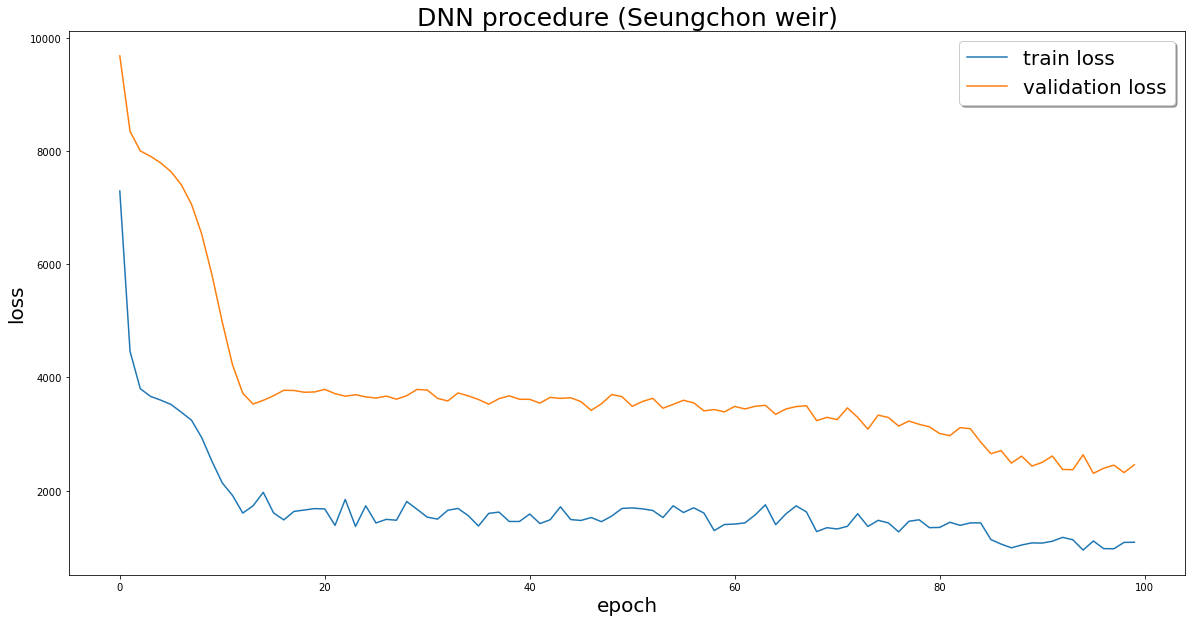

In [16]:
plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_python.png')

In [17]:
# DNN model (JS)
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [18]:
hist = model.fit(
    JS_train_x, JS_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 8017.8633 - mean_squared_error: 8017.8633 - mean_absolute_error: 79.0865 - val_loss: 10435.4082 - val_mean_squared_error: 10435.4082 - val_mean_absolute_error: 85.9399 - 425ms/epoch - 53ms/step
Epoch 2/100
8/8 - 0s - loss: 3974.8904 - mean_squared_error: 3974.8904 - mean_absolute_error: 50.8501 - val_loss: 8486.3594 - val_mean_squared_error: 8486.3604 - val_mean_absolute_error: 74.4066 - 23ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 3361.8267 - mean_squared_error: 3361.8267 - mean_absolute_error: 44.8741 - val_loss: 7665.9854 - val_mean_squared_error: 7665.9854 - val_mean_absolute_error: 68.7205 - 21ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 2656.5549 - mean_squared_error: 2656.5549 - mean_absolute_error: 37.5048 - val_loss: 5714.7461 - val_mean_squared_error: 5714.7461 - val_mean_absolute_error: 54.2017 - 23ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 1835.7970 - mean_squared_error: 1835.7970 - mean_absolute_error: 31.2998 - val_loss: 4011.9

Epoch 39/100
8/8 - 0s - loss: 1004.1562 - mean_squared_error: 1004.1562 - mean_absolute_error: 23.7881 - val_loss: 3044.4570 - val_mean_squared_error: 3044.4570 - val_mean_absolute_error: 34.6228 - 20ms/epoch - 2ms/step
Epoch 40/100
8/8 - 0s - loss: 982.1104 - mean_squared_error: 982.1104 - mean_absolute_error: 23.0423 - val_loss: 3126.5417 - val_mean_squared_error: 3126.5417 - val_mean_absolute_error: 34.9978 - 20ms/epoch - 2ms/step
Epoch 41/100
8/8 - 0s - loss: 954.3620 - mean_squared_error: 954.3620 - mean_absolute_error: 23.1756 - val_loss: 3242.3904 - val_mean_squared_error: 3242.3904 - val_mean_absolute_error: 35.6396 - 20ms/epoch - 2ms/step
Epoch 42/100
8/8 - 0s - loss: 1251.9310 - mean_squared_error: 1251.9310 - mean_absolute_error: 24.8607 - val_loss: 3147.6670 - val_mean_squared_error: 3147.6670 - val_mean_absolute_error: 35.0740 - 20ms/epoch - 2ms/step
Epoch 43/100
8/8 - 0s - loss: 1033.1273 - mean_squared_error: 1033.1273 - mean_absolute_error: 22.5312 - val_loss: 3022.1865

Epoch 77/100
8/8 - 0s - loss: 849.2957 - mean_squared_error: 849.2957 - mean_absolute_error: 19.8722 - val_loss: 2982.9395 - val_mean_squared_error: 2982.9395 - val_mean_absolute_error: 34.8821 - 22ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 791.8652 - mean_squared_error: 791.8652 - mean_absolute_error: 19.7545 - val_loss: 2309.1912 - val_mean_squared_error: 2309.1912 - val_mean_absolute_error: 29.5974 - 20ms/epoch - 2ms/step
Epoch 79/100
8/8 - 0s - loss: 841.6156 - mean_squared_error: 841.6156 - mean_absolute_error: 20.3350 - val_loss: 3043.4131 - val_mean_squared_error: 3043.4131 - val_mean_absolute_error: 35.4260 - 19ms/epoch - 2ms/step
Epoch 80/100
8/8 - 0s - loss: 836.5225 - mean_squared_error: 836.5225 - mean_absolute_error: 20.1552 - val_loss: 2361.3638 - val_mean_squared_error: 2361.3638 - val_mean_absolute_error: 30.0490 - 20ms/epoch - 2ms/step
Epoch 81/100
8/8 - 0s - loss: 785.3838 - mean_squared_error: 785.3838 - mean_absolute_error: 19.5078 - val_loss: 2731.4868 - val

In [19]:
# 테스트 데이터 입력
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 419.3966 - mean_squared_error: 419.3966 - mean_absolute_error: 16.6907
test_loss:  419.3965759277344
test_mae:  419.3965759277344


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1216      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dropout_1 (Dropout)         (None, 16)               

In [21]:
JS_test_y_pred_DNN = model.predict(JS_test_x)
JS_test_y_pred_DNN

2/2 [==============================] - 0s 997us/step


array([[62.83929 ],
       [64.8362  ],
       [78.69256 ],
       [79.67699 ],
       [49.66015 ],
       [43.656715],
       [35.845005],
       [29.190046],
       [33.508682],
       [28.995504],
       [30.513248],
       [24.41128 ],
       [64.110886],
       [72.08768 ],
       [52.550106],
       [86.56084 ],
       [67.81492 ],
       [28.680147],
       [38.171326],
       [29.325842],
       [60.069588],
       [52.835007],
       [35.078197],
       [44.114246],
       [48.598385],
       [51.63271 ],
       [71.818184],
       [50.910015],
       [23.844358],
       [58.750927],
       [32.745564],
       [45.93601 ],
       [46.89812 ],
       [53.44636 ],
       [63.720974],
       [55.292633],
       [53.928944],
       [62.02424 ],
       [76.20766 ],
       [61.795635],
       [78.29535 ],
       [58.141914],
       [52.69178 ],
       [31.473162],
       [32.597492],
       [36.517036],
       [32.923862],
       [28.45694 ],
       [51.55068 ],
       [44.004246]],

In [22]:
# checking loss
import matplotlib.pyplot as plt

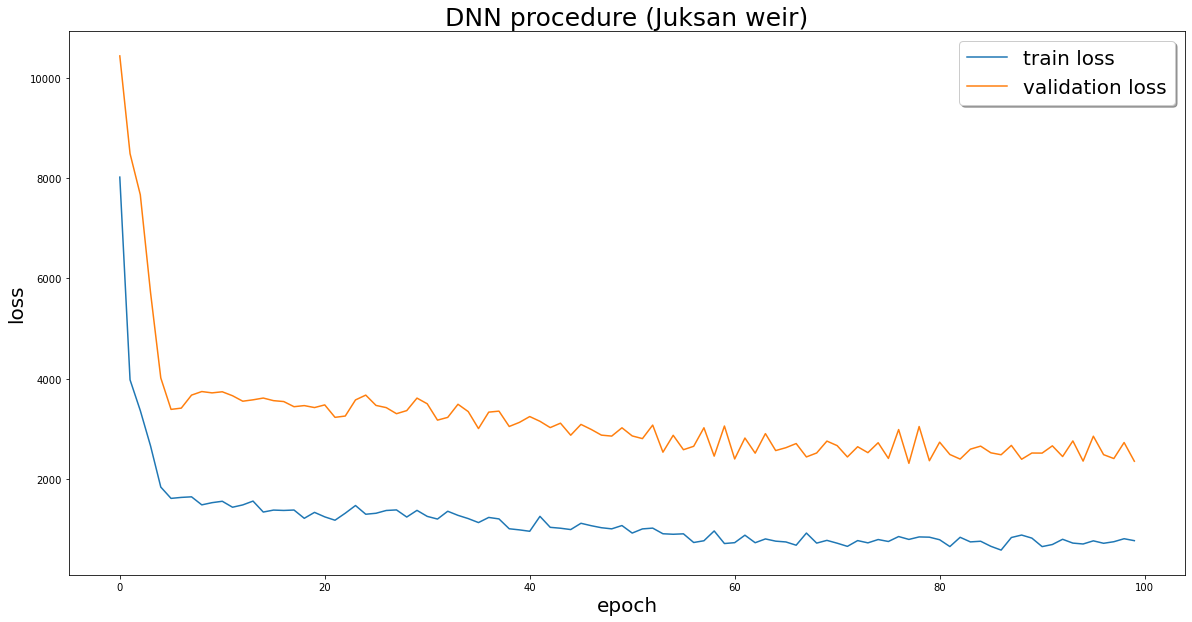

In [23]:
plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_python.png')

In [24]:
## Convolutional Neural Network
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [25]:
# CNN model (SC)
SC_train_x_CNN = SC_train_x.to_numpy().reshape(SC_train_x.shape[0], SC_train_x.shape[1], 1) 
SC_test_x_CNN = SC_test_x.to_numpy().reshape(SC_test_x.shape[0], SC_test_x.shape[1], 1) 

In [26]:
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [27]:
hist = model.fit(
    SC_train_x_CNN, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 1s - loss: 2272.9585 - mean_squared_error: 2272.9585 - mean_absolute_error: 35.4747 - val_loss: 3219.0264 - val_mean_squared_error: 3219.0264 - val_mean_absolute_error: 38.0805 - 534ms/epoch - 67ms/step
Epoch 2/100
8/8 - 0s - loss: 1340.9880 - mean_squared_error: 1340.9880 - mean_absolute_error: 28.7075 - val_loss: 2825.2209 - val_mean_squared_error: 2825.2209 - val_mean_absolute_error: 38.4356 - 31ms/epoch - 4ms/step
Epoch 3/100
8/8 - 0s - loss: 1289.3363 - mean_squared_error: 1289.3363 - mean_absolute_error: 26.3328 - val_loss: 3549.1282 - val_mean_squared_error: 3549.1282 - val_mean_absolute_error: 39.7731 - 26ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 1236.5210 - mean_squared_error: 1236.5210 - mean_absolute_error: 24.5318 - val_loss: 3500.9949 - val_mean_squared_error: 3500.9949 - val_mean_absolute_error: 39.4805 - 25ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 1266.7834 - mean_squared_error: 1266.7834 - mean_absolute_error: 25.8055 - val_loss: 3338.177

Epoch 39/100
8/8 - 0s - loss: 1023.9149 - mean_squared_error: 1023.9149 - mean_absolute_error: 23.5689 - val_loss: 2618.9993 - val_mean_squared_error: 2618.9993 - val_mean_absolute_error: 32.8914 - 25ms/epoch - 3ms/step
Epoch 40/100
8/8 - 0s - loss: 1081.0750 - mean_squared_error: 1081.0750 - mean_absolute_error: 22.9689 - val_loss: 2912.9893 - val_mean_squared_error: 2912.9893 - val_mean_absolute_error: 35.1429 - 26ms/epoch - 3ms/step
Epoch 41/100
8/8 - 0s - loss: 852.9551 - mean_squared_error: 852.9551 - mean_absolute_error: 20.9989 - val_loss: 2519.4412 - val_mean_squared_error: 2519.4412 - val_mean_absolute_error: 32.3139 - 25ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 1085.1388 - mean_squared_error: 1085.1388 - mean_absolute_error: 23.9347 - val_loss: 2830.5583 - val_mean_squared_error: 2830.5583 - val_mean_absolute_error: 34.4778 - 27ms/epoch - 3ms/step
Epoch 43/100
8/8 - 0s - loss: 967.8447 - mean_squared_error: 967.8447 - mean_absolute_error: 22.4014 - val_loss: 2569.3289

Epoch 77/100
8/8 - 0s - loss: 861.2806 - mean_squared_error: 861.2806 - mean_absolute_error: 21.0748 - val_loss: 2345.7253 - val_mean_squared_error: 2345.7253 - val_mean_absolute_error: 31.9605 - 25ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 803.7017 - mean_squared_error: 803.7017 - mean_absolute_error: 20.5258 - val_loss: 2149.0176 - val_mean_squared_error: 2149.0176 - val_mean_absolute_error: 29.6743 - 27ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 805.0696 - mean_squared_error: 805.0696 - mean_absolute_error: 20.4082 - val_loss: 2331.5955 - val_mean_squared_error: 2331.5955 - val_mean_absolute_error: 32.1363 - 24ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 757.9678 - mean_squared_error: 757.9678 - mean_absolute_error: 19.7067 - val_loss: 2320.9182 - val_mean_squared_error: 2320.9182 - val_mean_absolute_error: 32.3394 - 25ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 806.8867 - mean_squared_error: 806.8867 - mean_absolute_error: 20.1545 - val_loss: 1969.4644 - val

In [28]:
# 테스트 데이터 입력
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 798.1442 - mean_squared_error: 798.1442 - mean_absolute_error: 24.3446
test_loss:  798.1442260742188
test_mae:  798.1442260742188


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 64)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 32)             0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 7, 32)             0         
                                                                 
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                7200      
                                                      

In [30]:
SC_test_y_pred_CNN = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN

2/2 [==============================] - 0s 997us/step


array([[ 54.901394],
       [ 52.542355],
       [ 46.041927],
       [ 50.266968],
       [ 53.36549 ],
       [ 62.27046 ],
       [ 60.75415 ],
       [ 50.06688 ],
       [ 71.24609 ],
       [ 77.35284 ],
       [ 46.355827],
       [ 37.1503  ],
       [ 46.137947],
       [ 83.19786 ],
       [ 86.25777 ],
       [ 51.70183 ],
       [ 55.76209 ],
       [ 84.71095 ],
       [ 69.65631 ],
       [ 91.20301 ],
       [103.802124],
       [ 87.85455 ],
       [ 49.79987 ],
       [ 76.691696],
       [ 77.1744  ],
       [ 70.34534 ],
       [ 81.007774],
       [ 69.31919 ],
       [ 21.40198 ],
       [ 44.932426],
       [ 32.222206],
       [ 87.74448 ],
       [ 27.515139],
       [ 55.899616],
       [ 73.53908 ],
       [ 22.643738],
       [ 58.059284],
       [ 57.784794],
       [ 80.285194],
       [ 52.802765],
       [ 71.97734 ],
       [ 84.93664 ],
       [ 83.99644 ],
       [ 58.547173],
       [ 56.992016],
       [ 46.516182],
       [ 49.651917],
       [ 42.3

In [31]:
# checking loss
import matplotlib.pyplot as plt

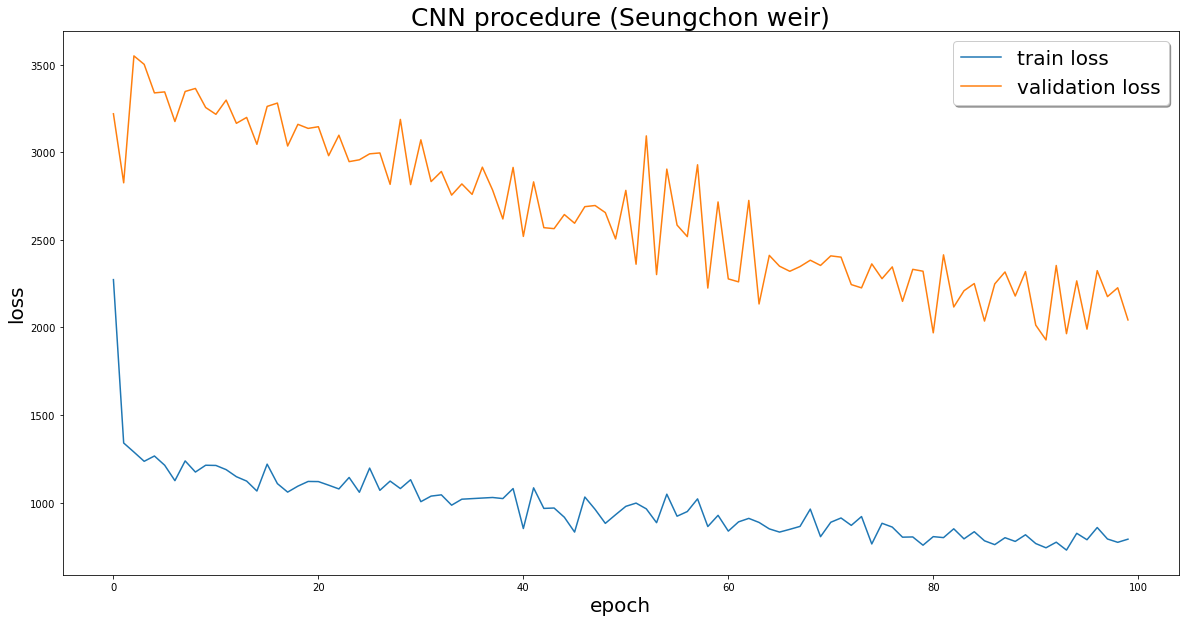

In [32]:
plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_python.png')

In [33]:
# CNN model (JS)
JS_train_x_CNN = JS_train_x.to_numpy().reshape(JS_train_x.shape[0], JS_train_x.shape[1], 1) 
JS_test_x_CNN = JS_test_x.to_numpy().reshape(JS_test_x.shape[0], JS_test_x.shape[1], 1) 

In [34]:
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [35]:
hist = model.fit(
    JS_train_x_CNN, JS_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 3730.3049 - mean_squared_error: 3730.3049 - mean_absolute_error: 47.5775 - val_loss: 5822.7153 - val_mean_squared_error: 5822.7153 - val_mean_absolute_error: 55.2812 - 446ms/epoch - 56ms/step
Epoch 2/100
8/8 - 0s - loss: 1752.2321 - mean_squared_error: 1752.2321 - mean_absolute_error: 29.2815 - val_loss: 3612.8762 - val_mean_squared_error: 3612.8762 - val_mean_absolute_error: 38.7944 - 31ms/epoch - 4ms/step
Epoch 3/100
8/8 - 0s - loss: 1373.2258 - mean_squared_error: 1373.2258 - mean_absolute_error: 29.4555 - val_loss: 3141.7119 - val_mean_squared_error: 3141.7119 - val_mean_absolute_error: 37.0268 - 25ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 1410.4207 - mean_squared_error: 1410.4207 - mean_absolute_error: 29.7816 - val_loss: 3418.6775 - val_mean_squared_error: 3418.6775 - val_mean_absolute_error: 37.8234 - 27ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 1391.3937 - mean_squared_error: 1391.3937 - mean_absolute_error: 28.6030 - val_loss: 3728.259

Epoch 39/100
8/8 - 0s - loss: 801.1924 - mean_squared_error: 801.1924 - mean_absolute_error: 21.9457 - val_loss: 2648.6682 - val_mean_squared_error: 2648.6682 - val_mean_absolute_error: 32.1581 - 25ms/epoch - 3ms/step
Epoch 40/100
8/8 - 0s - loss: 831.5525 - mean_squared_error: 831.5525 - mean_absolute_error: 21.3151 - val_loss: 2776.1030 - val_mean_squared_error: 2776.1030 - val_mean_absolute_error: 32.7536 - 25ms/epoch - 3ms/step
Epoch 41/100
8/8 - 0s - loss: 810.1368 - mean_squared_error: 810.1368 - mean_absolute_error: 21.9688 - val_loss: 2749.6914 - val_mean_squared_error: 2749.6914 - val_mean_absolute_error: 32.5933 - 24ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 820.8009 - mean_squared_error: 820.8009 - mean_absolute_error: 22.1984 - val_loss: 2718.1006 - val_mean_squared_error: 2718.1006 - val_mean_absolute_error: 32.3841 - 25ms/epoch - 3ms/step
Epoch 43/100
8/8 - 0s - loss: 880.5988 - mean_squared_error: 880.5988 - mean_absolute_error: 22.8243 - val_loss: 2874.3608 - val

Epoch 77/100
8/8 - 0s - loss: 650.9016 - mean_squared_error: 650.9016 - mean_absolute_error: 18.7611 - val_loss: 2722.9846 - val_mean_squared_error: 2722.9846 - val_mean_absolute_error: 33.2648 - 25ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 603.1295 - mean_squared_error: 603.1295 - mean_absolute_error: 17.9502 - val_loss: 2271.6345 - val_mean_squared_error: 2271.6345 - val_mean_absolute_error: 29.5128 - 24ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 615.4036 - mean_squared_error: 615.4036 - mean_absolute_error: 18.6385 - val_loss: 2632.6929 - val_mean_squared_error: 2632.6929 - val_mean_absolute_error: 32.6083 - 27ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 593.6454 - mean_squared_error: 593.6454 - mean_absolute_error: 17.7456 - val_loss: 2087.0476 - val_mean_squared_error: 2087.0476 - val_mean_absolute_error: 28.1801 - 25ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 677.3144 - mean_squared_error: 677.3144 - mean_absolute_error: 19.4770 - val_loss: 2722.5645 - val

In [36]:
# 테스트 데이터 입력
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 455.4024 - mean_squared_error: 455.4024 - mean_absolute_error: 17.3394
test_loss:  455.4024353027344
test_mae:  455.4024353027344


In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 17, 64)            192       
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 224)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                7200      
                                                      

In [38]:
JS_test_y_pred_CNN = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN

2/2 [==============================] - 0s 997us/step


array([[59.154922 ],
       [61.700676 ],
       [75.29834  ],
       [75.001945 ],
       [44.743404 ],
       [41.37179  ],
       [33.549156 ],
       [22.908632 ],
       [31.291208 ],
       [22.047255 ],
       [22.934858 ],
       [14.7514305],
       [46.540268 ],
       [65.9153   ],
       [49.174133 ],
       [69.257256 ],
       [39.03891  ],
       [19.253218 ],
       [32.560978 ],
       [26.582003 ],
       [49.948975 ],
       [38.421463 ],
       [22.288904 ],
       [38.117733 ],
       [47.627033 ],
       [46.141724 ],
       [69.4332   ],
       [36.828506 ],
       [15.344601 ],
       [45.394234 ],
       [26.801363 ],
       [52.49317  ],
       [36.89697  ],
       [46.99906  ],
       [61.39701  ],
       [36.16407  ],
       [52.349266 ],
       [68.79333  ],
       [76.70923  ],
       [54.706005 ],
       [72.47157  ],
       [60.218998 ],
       [60.212696 ],
       [39.607803 ],
       [37.321503 ],
       [37.090893 ],
       [30.121183 ],
       [21.11

In [39]:
# checking loss
import matplotlib.pyplot as plt

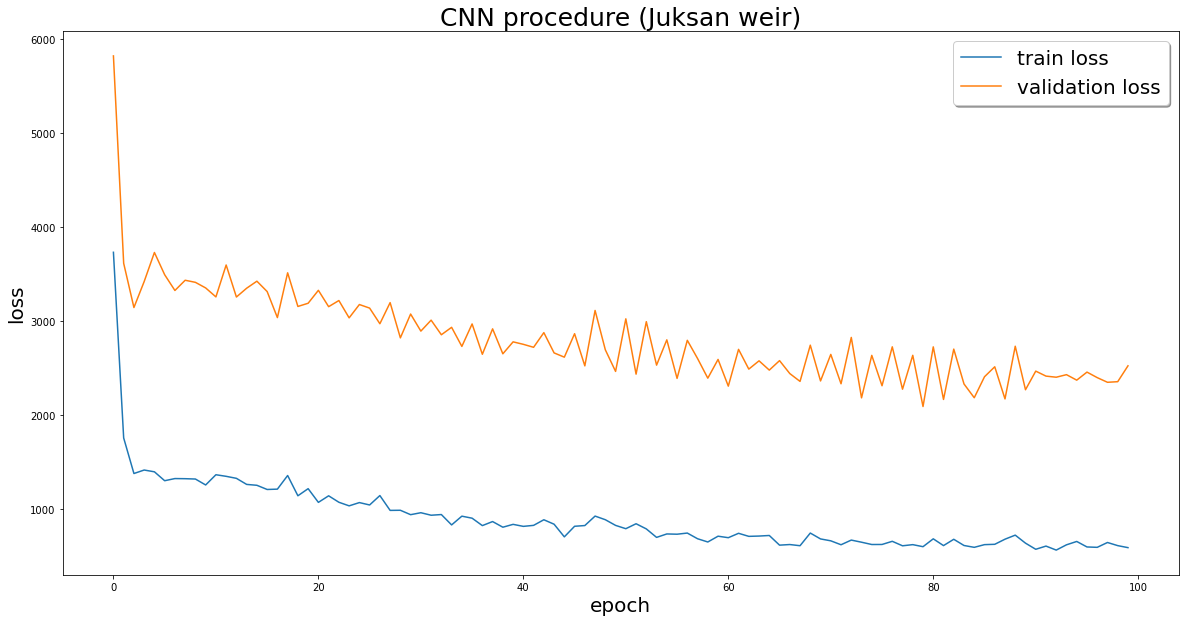

In [40]:
plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_python.png')

In [41]:
### Machine Learning Algorithm
## Extreme Gradient Boosting
!pip install xgboost

In [42]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error as MSE

In [43]:
## XGBoost model (SC)
regressor=xgb.XGBRegressor(eval_metric='rmse')
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(SC_train_x, SC_train_y)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 600}


In [44]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

regressor.fit(SC_train_x, SC_train_y)

SC_test_y_pred_xgb = regressor.predict(SC_test_x)
SC_test_y_pred_xgb

array([ 74.52631 ,  60.612858,  73.65756 ,  70.874565,  67.35715 ,
        91.90443 ,  76.68793 ,  65.824394, 111.43699 , 131.64368 ,
        26.882275,  35.75189 ,  75.55092 , 182.65732 , 131.38208 ,
        58.37984 ,  74.880554,  33.033985,  74.8228  , 118.555405,
       142.02943 , 120.19482 ,  69.63183 ,  88.89545 ,  92.92151 ,
        52.974003,  64.2177  ,  62.184875,  30.446218,  46.03933 ,
        31.328312,  96.97114 ,  39.06991 ,  55.206345,  75.595024,
        63.71001 ,  67.69882 ,  57.238426, 135.87012 ,  64.39922 ,
        81.67506 , 105.41551 , 103.003204,  49.939106,  50.248737,
        46.146393,  42.056065,  38.173275,  48.471836,  51.77171 ],
      dtype=float32)

In [45]:
## XGBoost model (JS)
regressor=xgb.XGBRegressor(eval_metric='rmse')
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(JS_train_x, JS_train_y)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 700}


In [46]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

regressor.fit(JS_train_x, JS_train_y)

JS_test_y_pred_xgb = regressor.predict(JS_test_x)
JS_test_y_pred_xgb

array([ 77.12253 ,  65.80073 , 105.4222  , 115.89675 ,  48.797928,
        40.40338 ,  51.25797 ,  44.943924,  40.778435,  30.7406  ,
        44.32552 ,  32.607872,  96.85335 ,  74.21722 ,  66.83014 ,
        79.632965,  76.12168 ,  36.528336,  42.64316 ,  45.64476 ,
        86.03087 ,  77.463066,  42.30404 ,  64.908295,  73.21732 ,
        28.248022,  75.7069  ,  49.082405,  36.757084,  52.841595,
        21.38312 ,  60.737583,  53.125072,  50.11267 ,  42.777245,
        32.42595 ,  81.898796,  55.39855 ,  85.67532 ,  51.30398 ,
        59.775673,  35.85241 ,  35.080837,  36.733925,  26.446198,
        59.193336,  30.673712,  29.108013,  46.230755,  38.833023],
      dtype=float32)

In [47]:
### write data
import pandas as pd

df_SC = pd.DataFrame([SC_test_y_pred_xgb, SC_test_y_pred_DNN, SC_test_y_pred_CNN]).T
df_SC.columns = ['XGBoost', 'DNN', 'CNN']
df_SC.to_csv('df_SC_res.csv', index=False, encoding='cp949') 

In [48]:
df_JS = pd.DataFrame([JS_test_y_pred_xgb, JS_test_y_pred_DNN, JS_test_y_pred_CNN]).T
df_JS.columns = ['XGBoost', 'DNN', 'CNN']
df_JS.to_csv('df_JS_res.csv', index=False, encoding='cp949') 